# [TLC Trip Record Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

## Data Cleaning

In [1]:
%reset -f
import cudf
column_names = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
    'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
    'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge']


#### Script to go through all files

In [2]:
# read all files in the parquets directory
""" 
parquet_files = !ls parquets
dtype_mapping = {
    'VendorID': 'int32',
    'tpep_pickup_datetime': 'datetime64[us]',
    'tpep_dropoff_datetime': 'datetime64[us]',
    'passenger_count': 'int64',
    'trip_distance': 'float64',
    'RatecodeID': 'int64',
    'store_and_fwd_flag': 'object',
    'PULocationID': 'int32',
    'DOLocationID': 'int32',
    'payment_type': 'int64',
    'fare_amount': 'float64',
    'extra': 'float64',
    'mta_tax': 'float64',
    'tip_amount': 'float64',
    'tolls_amount': 'float64',
    'improvement_surcharge': 'float64',
    'total_amount': 'float64',
    'congestion_surcharge': 'float64'
}
""" 

" \nparquet_files = !ls parquets\ndtype_mapping = {\n    'VendorID': 'int32',\n    'tpep_pickup_datetime': 'datetime64[us]',\n    'tpep_dropoff_datetime': 'datetime64[us]',\n    'passenger_count': 'int64',\n    'trip_distance': 'float64',\n    'RatecodeID': 'int64',\n    'store_and_fwd_flag': 'object',\n    'PULocationID': 'int32',\n    'DOLocationID': 'int32',\n    'payment_type': 'int64',\n    'fare_amount': 'float64',\n    'extra': 'float64',\n    'mta_tax': 'float64',\n    'tip_amount': 'float64',\n    'tolls_amount': 'float64',\n    'improvement_surcharge': 'float64',\n    'total_amount': 'float64',\n    'congestion_surcharge': 'float64'\n}\n"

In [3]:
# Read each parquet file with columns specified above and dropna and then store cleaned_parquets in the cleaned parquets directory
""" 
def clean_parquet_files():
    for file in parquet_files:
      df = cudf.read_parquet(f'parquets/{file}', columns=column_names)
      df.dropna(inplace=True)
      # apply datamapping to make consistent data types
      df = df.astype(dtype_mapping)
      df.to_parquet(f'cleaned_parquets/{file}')
"""

" \ndef clean_parquet_files():\n    for file in parquet_files:\n      df = cudf.read_parquet(f'parquets/{file}', columns=column_names)\n      df.dropna(inplace=True)\n      # apply datamapping to make consistent data types\n      df = df.astype(dtype_mapping)\n      df.to_parquet(f'cleaned_parquets/{file}')\n"

In [4]:
# clean_parquet_files()

#### Read all parquet files in a single dataframe

In [5]:
# read all files in the parquets directory
parquet_files = !ls cleaned_parquets
# append relative path to each file name in parquet files list
parquet_files = [f'cleaned_parquets/{file}' for file in parquet_files]
print(parquet_files)

['cleaned_parquets/yellow_tripdata_2023-01.parquet', 'cleaned_parquets/yellow_tripdata_2023-02.parquet', 'cleaned_parquets/yellow_tripdata_2023-03.parquet', 'cleaned_parquets/yellow_tripdata_2023-04.parquet', 'cleaned_parquets/yellow_tripdata_2023-05.parquet', 'cleaned_parquets/yellow_tripdata_2023-06.parquet', 'cleaned_parquets/yellow_tripdata_2023-07.parquet', 'cleaned_parquets/yellow_tripdata_2023-08.parquet', 'cleaned_parquets/yellow_tripdata_2023-09.parquet', 'cleaned_parquets/yellow_tripdata_2023-10.parquet']


In [6]:
%%time

df = cudf.read_parquet(parquet_files, columns=column_names)

# Now df contains all the parquet files in a single dataframe
df.shape

CPU times: user 693 ms, sys: 1.06 s, total: 1.75 s
Wall time: 663 ms


(30597266, 18)

In [7]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1,0.97,1,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1,1.10,1,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1,2.51,1,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0,1.90,1,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1,1.43,1,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367351,1,2023-10-31 23:30:25,2023-10-31 23:57:54,2,6.90,1,N,142,160,1,32.4,3.50,0.5,9.30,0.0,1.0,46.70,2.5
3367352,1,2023-10-31 23:02:09,2023-10-31 23:09:23,1,2.30,1,N,48,143,1,10.7,3.50,0.5,3.15,0.0,1.0,18.85,2.5
3367353,1,2023-10-31 23:14:41,2023-10-31 23:22:46,2,2.70,1,N,142,236,2,12.1,3.50,0.5,0.00,0.0,1.0,17.10,2.5
3367354,1,2023-10-31 23:31:33,2023-11-01 00:20:19,3,15.70,1,N,142,61,1,54.1,3.50,0.5,14.80,0.0,1.0,73.90,2.5


### Temporal Analysis

#### Peak Hours: Determine the peak hours of taxi demand based on pickup and dropoff times.

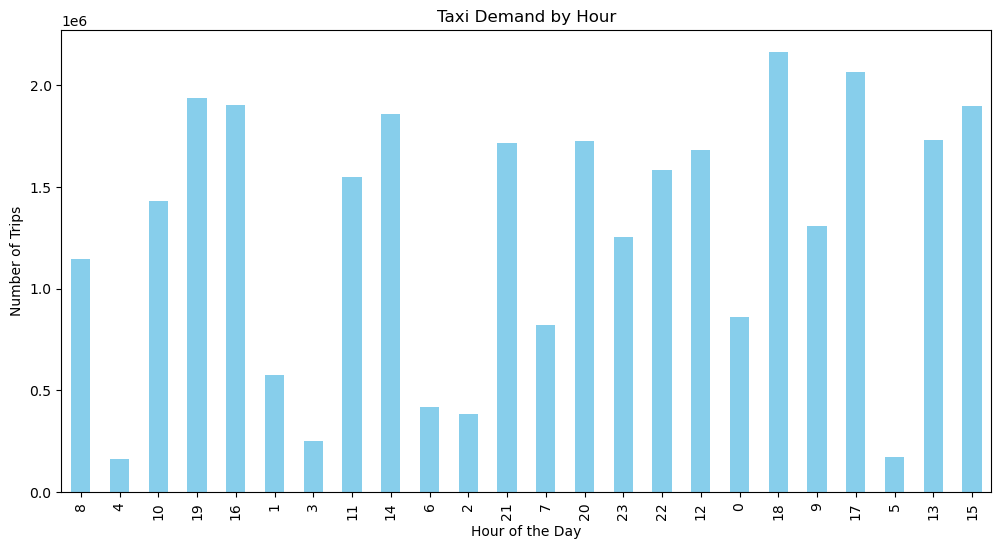

In [8]:
import matplotlib.pyplot as plt

df['tpep_pickup_datetime'] = cudf.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = cudf.to_datetime(df['tpep_dropoff_datetime'])

# Extract hour information from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by pickup hour and count the number of trips
hourly_demand = df.groupby('pickup_hour').size().to_pandas()

# Plot the results
plt.figure(figsize=(12, 6))
hourly_demand.plot(kind='bar', color='skyblue')
plt.title('Taxi Demand by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

#### Day of Week Trends: Analyze how taxi usage varies on different days of the week.

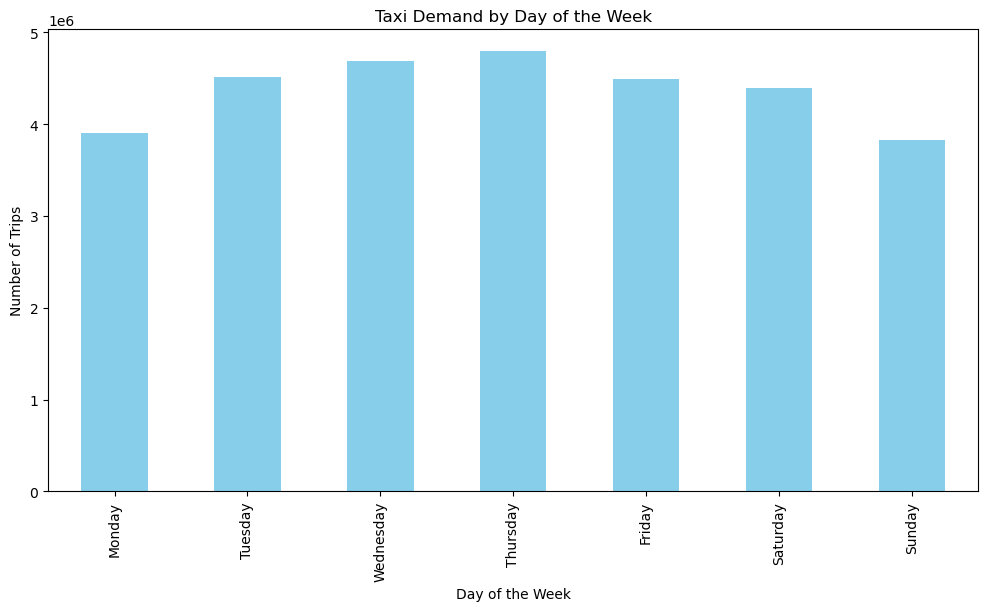

In [9]:
# Extract day of the week information from pickup datetime
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Map numerical day of week to actual day names
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['pickup_day_name'] = df['pickup_day_of_week'].map(day_mapping)

# Group by day of the week and count the number of trips
daily_demand = df.groupby('pickup_day_name').size().to_pandas()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_demand = daily_demand.reindex(days_order)

# Plot the results
plt.figure(figsize=(12, 6))
daily_demand.plot(kind='bar', color='skyblue')
plt.title('Taxi Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

#### Monthly Trends: Explore seasonal variations in taxi usage.

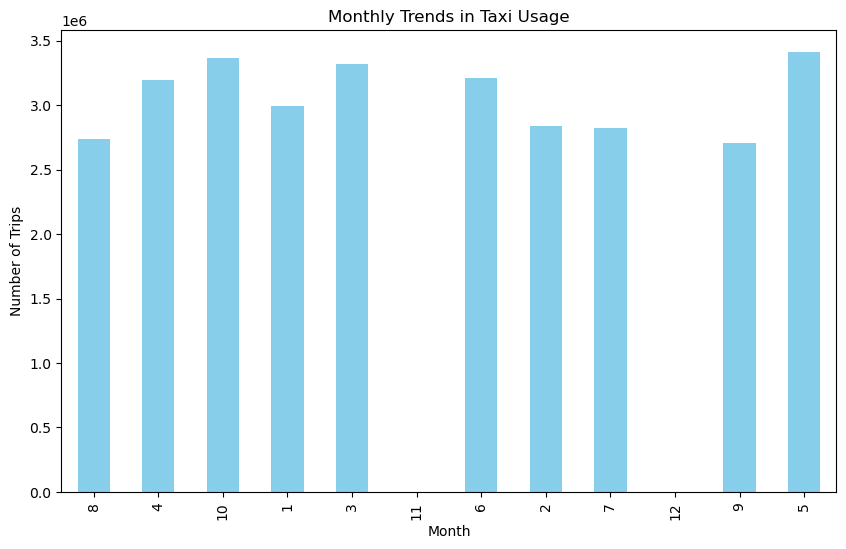

In [10]:
# Extract month information from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and count the number of trips
monthly_demand = df.groupby('pickup_month').size().to_pandas()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_demand.plot(kind='bar', color='skyblue')
plt.title('Monthly Trends in Taxi Usage')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

#### Popular Pickup and Dropoff Locations: Identify the most common pickup and dropoff locations (PULocationID and DOLocationID).

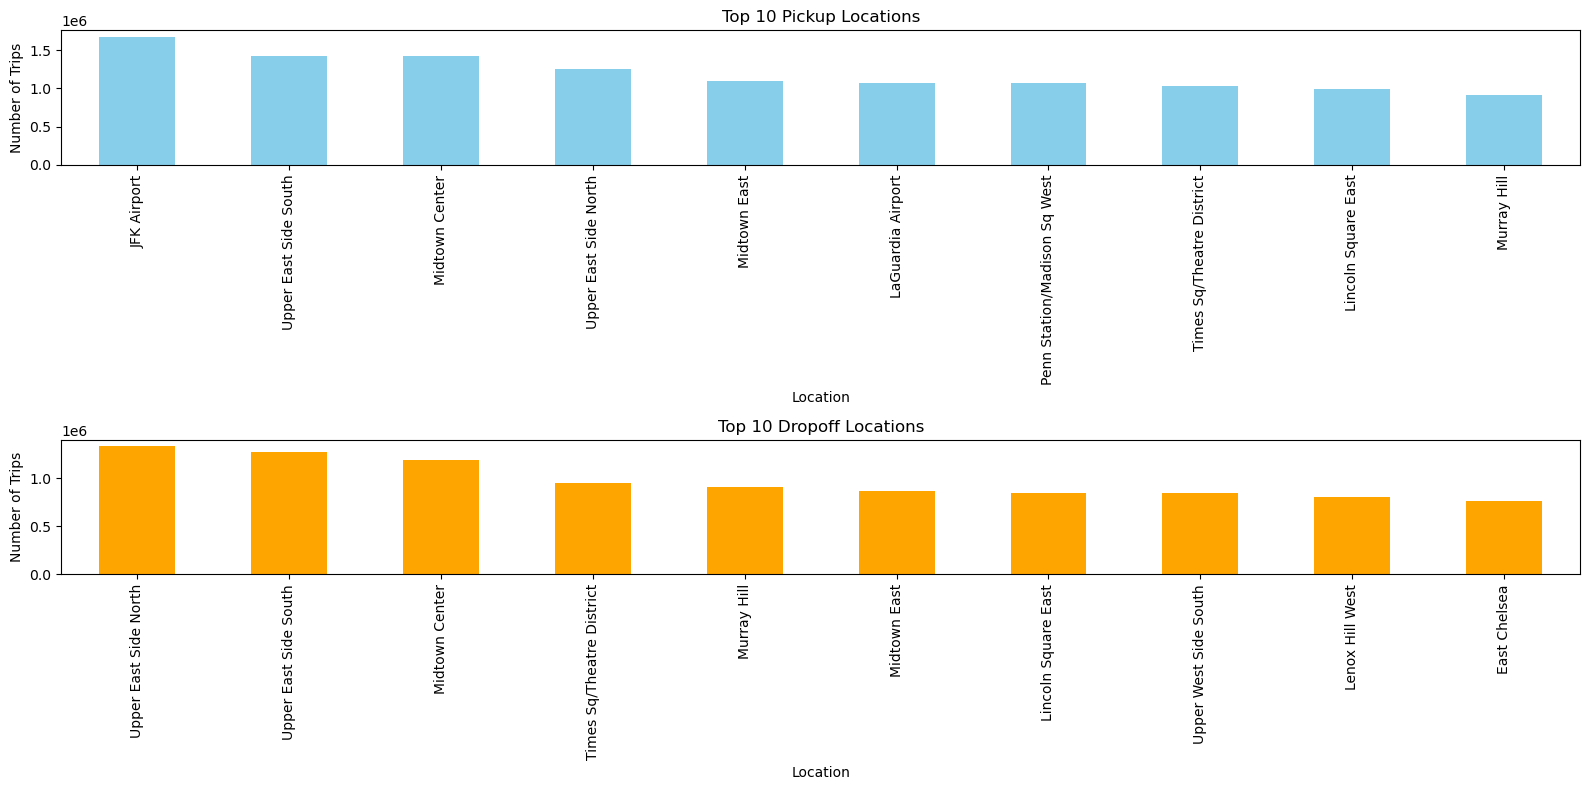

In [11]:
# Load the mapping file
mapping_df = cudf.read_csv('taxi+_zone_lookup.csv')

# Merge the mapping information with the main DataFrame for pickup locations
merged_pickup_df = df.merge(mapping_df, left_on='PULocationID', right_on='LocationID', how='inner')

# Merge the mapping information with the main DataFrame for dropoff locations
merged_dropoff_df = df.merge(mapping_df, left_on='DOLocationID', right_on='LocationID', how='inner')

# Most common pickup locations
top_pickup_locations = merged_pickup_df['Zone'].value_counts().head(10).to_pandas()

# Most common dropoff locations
top_dropoff_locations = merged_dropoff_df['Zone'].value_counts().head(10).to_pandas()

# Plotting the results
plt.figure(figsize=(16, 8))

# Plot for top pickup locations
plt.subplot(2, 1, 1)
top_pickup_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Location')
plt.ylabel('Number of Trips')

# Plot for top dropoff locations
plt.subplot(2, 1, 2)
top_dropoff_locations.plot(kind='bar', color='orange')
plt.title('Top 10 Dropoff Locations')
plt.xlabel('Location')
plt.ylabel('Number of Trips')

plt.tight_layout()
plt.show()


In [12]:
%reset -f
import cudf
column_names = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
    'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
    'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge']
parquet_files = !ls cleaned_parquets
parquet_files = [f'cleaned_parquets/{file}' for file in parquet_files]
df = cudf.read_parquet(parquet_files, columns=column_names)

#### Mapping Routes: Visualize routes with high trip density and explore spatial patterns.

In [16]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [17]:
mapping_df = cudf.read_csv('taxi+_zone_lookup.csv')
mapping_df.columns

Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')